In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
#!pip install yfinance
import yfinance as yf

In [ ]:
trading_days = 252
ticker_CSCO = yf.Ticker('CSCO') #Cisco - tentative company
ticker_NTGR = yf.Ticker('NTGR') #NETGEAR
prices_CSCO = ticker_CSCO.history(period='5y')['Close']
prices_NTGR = ticker_NTGR.history(period='5y')['Close']
daily_returns_CSCO = prices_CSCO.pct_change().dropna()
daily_returns_NTGR = prices_NTGR.pct_change().dropna()
daily_returns_CSCO

Date
2018-11-20 00:00:00-05:00   -0.027541
2018-11-21 00:00:00-05:00    0.008991
2018-11-23 00:00:00-05:00   -0.007797
2018-11-26 00:00:00-05:00    0.023125
2018-11-27 00:00:00-05:00    0.012069
                               ...   
2023-11-10 00:00:00-05:00    0.011346
2023-11-13 00:00:00-05:00   -0.006845
2023-11-14 00:00:00-05:00    0.017997
2023-11-15 00:00:00-05:00    0.002069
2023-11-16 00:00:00-05:00   -0.098348
Name: Close, Length: 1256, dtype: float64

In [ ]:
benchmark = yf.Ticker('^TNX')
ten_yr_yield = benchmark.history(period='5y')['Close'][1:] * 0.01
risk_free_rate = ten_yr_yield / (trading_days * 10)

In [ ]:
def rolling_sharpe(daily_returns, risk_free_rate, period):
  D_t = (daily_returns - risk_free_rate).rolling(period)
  D_bar = D_t.mean()
  sigma_D = D_t.std()
  return (math.sqrt(period)*D_bar / sigma_D).dropna()

In [ ]:
annualized_rs_CSCO = rolling_sharpe(daily_returns_CSCO, risk_free_rate, trading_days)
annualized_rs_NTGR = rolling_sharpe(daily_returns_NTGR, risk_free_rate, trading_days)
annualized_rs_CSCO

Date
2019-11-20 00:00:00-05:00    0.174389
2019-11-21 00:00:00-05:00    0.259565
2019-11-22 00:00:00-05:00    0.226469
2019-11-25 00:00:00-05:00    0.306573
2019-11-26 00:00:00-05:00    0.208034
                               ...   
2023-11-10 00:00:00-05:00    1.157584
2023-11-13 00:00:00-05:00    0.936290
2023-11-14 00:00:00-05:00    1.131679
2023-11-15 00:00:00-05:00    1.148395
2023-11-16 00:00:00-05:00    0.545096
Name: Close, Length: 1005, dtype: float64

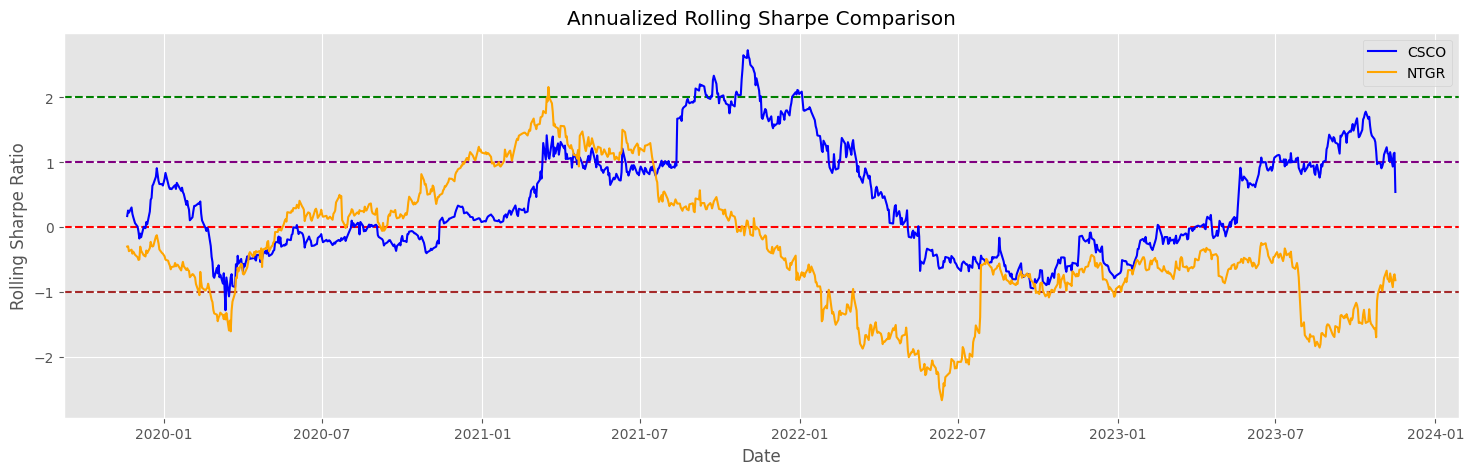

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe Comparison')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = -1, color = 'brown', linestyle = 'dashed')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'purple', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_CSCO, color = 'blue', label = 'CSCO')
plt.plot(annualized_rs_NTGR, color = 'orange', label = 'NTGR')
plt.legend()

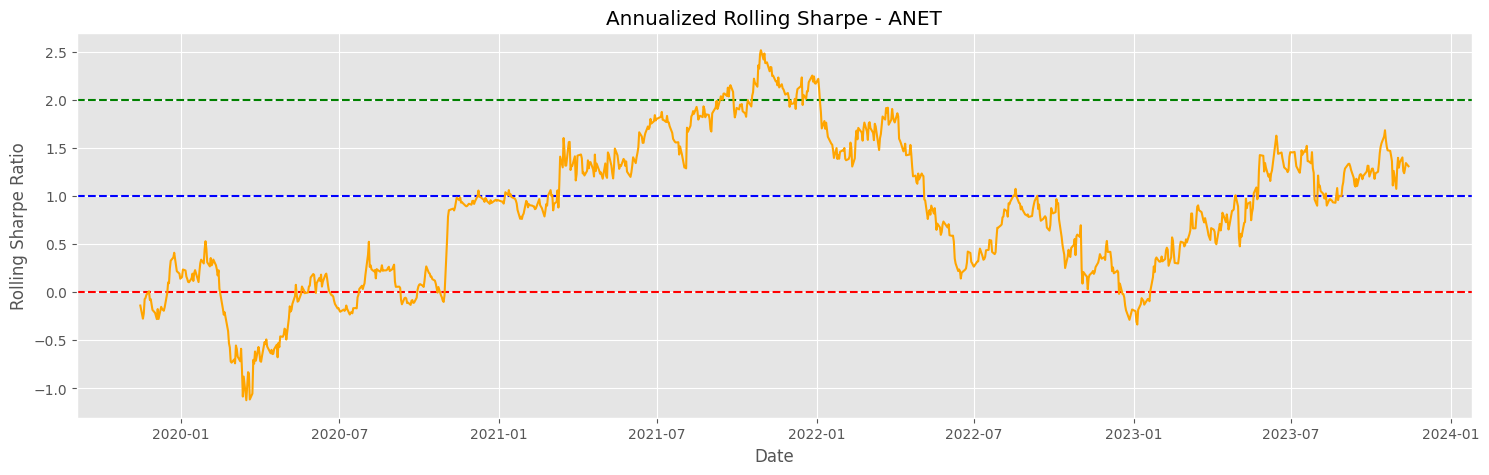

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe - ANET')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_ANET, color = 'orange')